<a href="https://colab.research.google.com/github/DCNwonu/Text-Analytics_Low-carbon/blob/main/Bert_fine_tuned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BERT code with clustering (PCA) ML for Extractive summarisation with fine tuning (fine_tuned weights are deployed)

In [1]:
!pip install transformers
!pip install keras
!pip install torch

import numpy as np
import pandas as pd
import nltk
import torch
import transformers as ppb
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from tqdm import tqdm
nltk.download('punkt')
from nltk import sent_tokenize



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
# Set up BERT tokenizer and model (no pretrained weights)
model_class, tokenizer_class, pretrained_weights = (ppb.BertForSequenceClassification, ppb.BertTokenizer, 'bert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights, num_labels=2)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [3]:
paragraph ="""The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).[4] The outbreak was first identified in Wuhan, Hubei, China, in December 2019, and was recognized as a pandemic by the World Health Organization (WHO) on 11 March 2020.[5] As of 25 March, more than 422,000 cases of COVID-19 have been reported in more than 190 countries and territories, resulting in more than 18,900 deaths and more than 109,000 recoveries.[2][3]
The virus is typically spread during close contact and via respiratory droplets produced when people cough or sneeze.[6][7] Respiratory droplets may be produced during breathing but it is not considered airborne.[6] It may also spread when one touches a contaminated surface and then their face.[6][7] It is most contagious when people are symptomatic, although spread may be possible before symptoms appear.[7] The time between exposure and symptom onset is typically around five days, but may range from two to fourteen days.[8][9] Common symptoms include fever, cough, and shortness of breath.[8] Complications may include pneumonia and acute respiratory distress syndrome.[10] There is no known vaccine or specific antiviral treatment.[6] Primary treatment is symptomatic and supportive therapy.[11] Recommended preventive measures include hand washing, covering the mouth when coughing, maintaining distance from other people, and monitoring and self-isolation for people who suspect they are infected.[6]
Efforts to prevent the virus spreading include travel restrictions, quarantines, curfews, event postponements and cancellations, and facility closures. These include a quarantine of Hubei, nationwide quarantines in Italy and elsewhere in Europe, nationwide lockdown in India, curfew measures elsewhere in China and South Korea,[12][13][14] various border closures or incoming passenger restrictions,[15][16] screening at airports and train stations,[17] and travel advisories regarding regions with community transmission.[18][19][20][21] Schools and universities have closed either on a nationwide or local basis in more than 124 countries, affecting more than 1.2 billion students.[22]
The pandemic has led to global socioeconomic disruption,[23] the postponement or cancellation of sporting, religious, and cultural events,[24] and widespread fears of supply shortages which have spurred panic buying.[25][26] Misinformation and conspiracy theories about the virus have spread online,[27][28] and there have been incidents of xenophobia and racism against Chinese and other East or Southeast Asian people.[29]
Glen Travis Campbell (April 22, 1936 – August 8, 2017) was an American singer, guitarist, songwriter, television host, and actor. He was best known for a series of hit songs in the 1960s and 1970s, and for hosting a music and comedy variety show called The Glen Campbell Goodtime Hour on CBS television, from January 1969 until June 1972.[1] He released 64 albums in a career that spanned five decades, selling over 45 million records worldwide, including twelve gold albums, four platinum albums, and one double-platinum album.
Born in Billstown, Arkansas, Campbell began his professional career as a studio musician in Los Angeles, spending several years playing with the group of instrumentalists later known as "The Wrecking Crew". After becoming a solo artist, he placed a total of 80 different songs on either the Billboard Country Chart, Billboard Hot 100, or Adult Contemporary Chart, of which 29 made the top 10 and of which nine reached number one on at least one of those charts. Among Campbell's hits are "Universal Soldier", his first hit from 1965, along with "Gentle on My Mind" (1967), "By the Time I Get to Phoenix" (1967), "Dreams of the Everyday Housewife" (1968), "Wichita Lineman" (1968), "Galveston" (1969), "Rhinestone Cowboy" (1975) and "Southern Nights" (1977).[2]
In 1967, Campbell won four Grammys in the country and pop categories. For "Gentle on My Mind", he received two awards in country and western; "By the Time I Get to Phoenix" did the same in pop. Three of his early hits later won Grammy Hall of Fame Awards (2000, 2004, 2008), while Campbell himself won the Grammy Lifetime Achievement Award in 2012. He owned trophies for Male Vocalist of the Year from both the Country Music Association (CMA) and the Academy of Country Music (ACM), and took the CMA's top award as 1968 Entertainer of the Year. Campbell played a supporting role in the film True Grit (1969), which earned him a Golden Globe nomination for Most Promising Newcomer. He also sang the title song, which was nominated for an Academy Award.
"""
# Split the paragraph into sentences
paragraph_split = sent_tokenize(paragraph)

# Tokenize the sentences
input_tokens = [tokenizer.encode(sent, add_special_tokens=True) for sent in paragraph_split]

# Pad the sequences
input_ids = pad_sequences(input_tokens, maxlen=100, dtype="long", value=0, truncating="post", padding="post")

# Create attention masks
def create_attention_mask(input_id):
    attention_masks = []
    for sent in input_ids:
        att_mask = [int(token_id > 0) for token_id in sent]
        attention_masks.append(att_mask)
    return attention_masks

input_masks = create_attention_mask(input_ids)

# Assuming paragraph_split contains the split sentences from the paragraph
labels = torch.tensor([1 if any(phrase in sentence.lower() for phrase in ['travel', 'people', 'China', 'pandemic', 'Campbell']) else 0 for sentence in paragraph_split])





In [5]:
# Convert input_ids and attention_mask to tensors
input_ids = torch.tensor(input_ids)
attention_mask = torch.tensor(input_masks)
# Create DataLoader for training
batch_size = 8
train_data = TensorDataset(input_ids, attention_mask, labels)
train_dataloader = DataLoader(train_data, batch_size=batch_size)


Setting up the model training scheme for BERT fine-tuning

In [6]:
# Set up optimizer and loss function
optimizer = optim.AdamW(model.parameters(), lr=3e-5, eps=1e-8, betas=(0.9, 0.999), weight_decay=0.01)
loss_fn = CrossEntropyLoss()

# Fine-tuning loop
epochs = 3
model.train()

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, batch in enumerate(tqdm(train_dataloader, desc="Training")):
        batch_input_ids, batch_attention_mask, batch_labels = batch

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_mask, labels=batch_labels)
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print loss at each step
        if step % 100 == 0:
            print(f"Step {step}, Loss: {loss.item()}")


Epoch 1/3


Training:  25%|██▌       | 1/4 [00:13<00:40, 13.34s/it]

Step 0, Loss: 0.7650616765022278


Training: 100%|██████████| 4/4 [00:35<00:00,  8.90s/it]


Epoch 2/3


Training:  25%|██▌       | 1/4 [00:08<00:25,  8.44s/it]

Step 0, Loss: 0.6733090877532959


Training: 100%|██████████| 4/4 [00:33<00:00,  8.35s/it]


Epoch 3/3


Training:  25%|██▌       | 1/4 [00:07<00:21,  7.04s/it]

Step 0, Loss: 0.5976242423057556


Training: 100%|██████████| 4/4 [00:29<00:00,  7.49s/it]


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
model.save_pretrained("./content/drive/Python/fine_tuned_bert.pth")
tokenizer.save_pretrained("./content/drive/Python/fine_tuned_bert")


('./content/drive/Python/fine_tuned_bert/tokenizer_config.json',
 './content/drive/Python/fine_tuned_bert/special_tokens_map.json',
 './content/drive/Python/fine_tuned_bert/vocab.txt',
 './content/drive/Python/fine_tuned_bert/added_tokens.json')

Accuracy: 0.9666666666666667
Confusion Matrix:
[[21  0]
 [ 1  8]]
Precision: 1.0
Recall: 0.8888888888888888
F1-Score: 0.9411764705882353


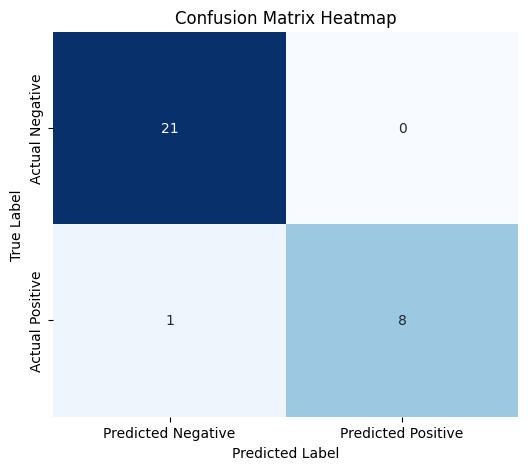

<ipython-input-9-9dc38e8905b5>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='viridis')


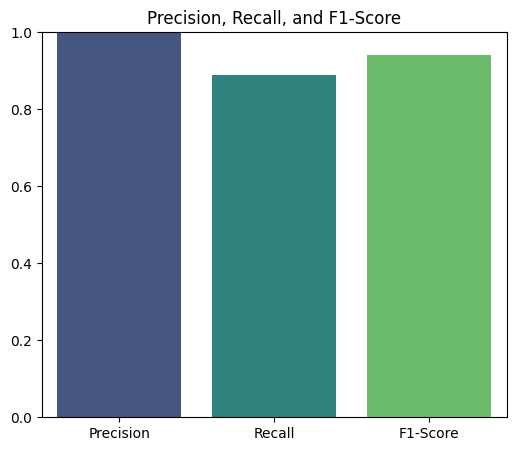

In [9]:
# Test the fine-tuned model
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    outputs = model(input_ids=input_ids, attention_mask=attention_mask)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Assuming labels and predictions are numpy arrays
# Accuracy
accuracy = accuracy_score(labels.numpy(), predictions.numpy())
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(labels.numpy(), predictions.numpy())
print(f"Confusion Matrix:\n{conf_matrix}")

# Precision, Recall, F1-Score
precision = precision_score(labels.numpy(), predictions.numpy())
recall = recall_score(labels.numpy(), predictions.numpy())
f1 = f1_score(labels.numpy(), predictions.numpy())

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Visualization of the multiple metrics

# 1. Heatmap of Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Bar Chart for Precision, Recall, F1-Score
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(6, 5))
sns.barplot(x=metrics, y=scores, palette='viridis')
plt.ylim(0, 1)  # Set the y-axis from 0 to 1 since metrics are in this range
plt.title('Precision, Recall, and F1-Score')
plt.show()


# Deploy fine-tuned bert for extractive summarisation using sentence scoring/clustering

In [15]:
!pip install rouge_score
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import matplotlib.pyplot as plt
from nltk import sent_tokenize
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=69644f83b03e200f9f8b50394c5a585a9a51c05f957b339e53e14ca0eff2731f
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [24]:
# Load the fine-tuned BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('./content/drive/Python/fine_tuned_bert')  # Replace with your saved model path


In [18]:
paragraph ="""The 2019–20 coronavirus pandemic is an ongoing pandemic of coronavirus disease 2019 (COVID-19), caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2).[4] The outbreak was first identified in Wuhan, Hubei, China, in December 2019, and was recognized as a pandemic by the World Health Organization (WHO) on 11 March 2020.[5] As of 25 March, more than 422,000 cases of COVID-19 have been reported in more than 190 countries and territories, resulting in more than 18,900 deaths and more than 109,000 recoveries.[2][3]
The virus is typically spread during close contact and via respiratory droplets produced when people cough or sneeze.[6][7] Respiratory droplets may be produced during breathing but it is not considered airborne.[6] It may also spread when one touches a contaminated surface and then their face.[6][7] It is most contagious when people are symptomatic, although spread may be possible before symptoms appear.[7] The time between exposure and symptom onset is typically around five days, but may range from two to fourteen days.[8][9] Common symptoms include fever, cough, and shortness of breath.[8] Complications may include pneumonia and acute respiratory distress syndrome.[10] There is no known vaccine or specific antiviral treatment.[6] Primary treatment is symptomatic and supportive therapy.[11] Recommended preventive measures include hand washing, covering the mouth when coughing, maintaining distance from other people, and monitoring and self-isolation for people who suspect they are infected.[6]
Efforts to prevent the virus spreading include travel restrictions, quarantines, curfews, event postponements and cancellations, and facility closures. These include a quarantine of Hubei, nationwide quarantines in Italy and elsewhere in Europe, nationwide lockdown in India, curfew measures elsewhere in China and South Korea,[12][13][14] various border closures or incoming passenger restrictions,[15][16] screening at airports and train stations,[17] and travel advisories regarding regions with community transmission.[18][19][20][21] Schools and universities have closed either on a nationwide or local basis in more than 124 countries, affecting more than 1.2 billion students.[22]
The pandemic has led to global socioeconomic disruption,[23] the postponement or cancellation of sporting, religious, and cultural events,[24] and widespread fears of supply shortages which have spurred panic buying.[25][26] Misinformation and conspiracy theories about the virus have spread online,[27][28] and there have been incidents of xenophobia and racism against Chinese and other East or Southeast Asian people.[29]
Glen Travis Campbell (April 22, 1936 – August 8, 2017) was an American singer, guitarist, songwriter, television host, and actor. He was best known for a series of hit songs in the 1960s and 1970s, and for hosting a music and comedy variety show called The Glen Campbell Goodtime Hour on CBS television, from January 1969 until June 1972.[1] He released 64 albums in a career that spanned five decades, selling over 45 million records worldwide, including twelve gold albums, four platinum albums, and one double-platinum album.
Born in Billstown, Arkansas, Campbell began his professional career as a studio musician in Los Angeles, spending several years playing with the group of instrumentalists later known as "The Wrecking Crew". After becoming a solo artist, he placed a total of 80 different songs on either the Billboard Country Chart, Billboard Hot 100, or Adult Contemporary Chart, of which 29 made the top 10 and of which nine reached number one on at least one of those charts. Among Campbell's hits are "Universal Soldier", his first hit from 1965, along with "Gentle on My Mind" (1967), "By the Time I Get to Phoenix" (1967), "Dreams of the Everyday Housewife" (1968), "Wichita Lineman" (1968), "Galveston" (1969), "Rhinestone Cowboy" (1975) and "Southern Nights" (1977).[2]
In 1967, Campbell won four Grammys in the country and pop categories. For "Gentle on My Mind", he received two awards in country and western; "By the Time I Get to Phoenix" did the same in pop. Three of his early hits later won Grammy Hall of Fame Awards (2000, 2004, 2008), while Campbell himself won the Grammy Lifetime Achievement Award in 2012. He owned trophies for Male Vocalist of the Year from both the Country Music Association (CMA) and the Academy of Country Music (ACM), and took the CMA's top award as 1968 Entertainer of the Year. Campbell played a supporting role in the film True Grit (1969), which earned him a Golden Globe nomination for Most Promising Newcomer. He also sang the title song, which was nominated for an Academy Award.
"""
# Split the paragraph into sentences
paragraph_split = sent_tokenize(paragraph)

# Tokenize the sentences
input_tokens = [tokenizer.encode(sent, add_special_tokens=True) for sent in paragraph_split]

# Pad the sequences
input_ids = pad_sequences(input_tokens, maxlen=100, dtype="long", value=0, truncating="post", padding="post")

# Create attention masks
def create_attention_mask(input_id):
    attention_masks = []
    for sent in input_ids:
        att_mask = [int(token_id > 0) for token_id in sent]
        attention_masks.append(att_mask)
    return attention_masks

input_masks = create_attention_mask(input_ids)

In [19]:
# Convert input tokens and masks to torch tensors
input_ids = torch.tensor(input_ids)
attention_mask = torch.tensor(input_masks)


In [22]:
# Load the fine-tuned BERT model for summarization
model = BertForSequenceClassification.from_pretrained('./content/drive/Python/fine_tuned_bert.pth')  # Replace with your saved model path

# Put the model in evaluation mode (we're not training, just inferring)
model.eval()



BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

# Deploy via k-means clustering

In [27]:
# Use the model to obtain sentence embeddings
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# Extract the sentence embeddings from the output (using the last hidden state)
sentence_features = outputs[0].detach().numpy()  # Directly extract the 2D features  # Shape: (num_sentences, embedding_dim)
print(outputs[0].shape)


torch.Size([30, 2])


In [28]:
# Check the shape of the sentence embeddings
print(f"Sentence embeddings shape: {sentence_features.shape}")  # Expect: (num_sentences, 768)

Sentence embeddings shape: (30, 2)


The 7 extracted sentences are:
1. [11] Recommended preventive measures include hand washing, covering the mouth when coughing, maintaining distance from other people, and monitoring and self-isolation for people who suspect they are infected.
2. [6]
Efforts to prevent the virus spreading include travel restrictions, quarantines, curfews, event postponements and cancellations, and facility closures.
3. [18][19][20][21] Schools and universities have closed either on a nationwide or local basis in more than 124 countries, affecting more than 1.2 billion students.
4. [22]
The pandemic has led to global socioeconomic disruption,[23] the postponement or cancellation of sporting, religious, and cultural events,[24] and widespread fears of supply shortages which have spurred panic buying.
5. [2]
In 1967, Campbell won four Grammys in the country and pop categories.
6. For "Gentle on My Mind", he received two awards in country and western; "By the Time I Get to Phoenix" did the same in pop.
7. H

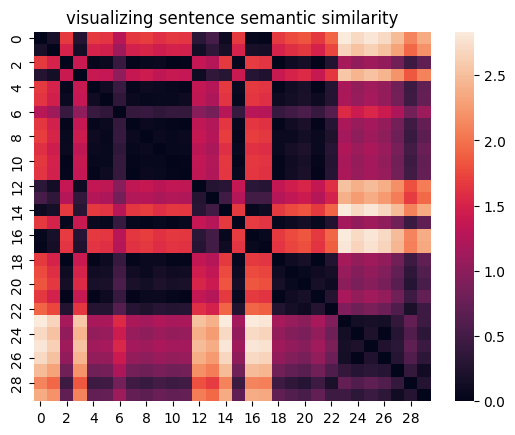

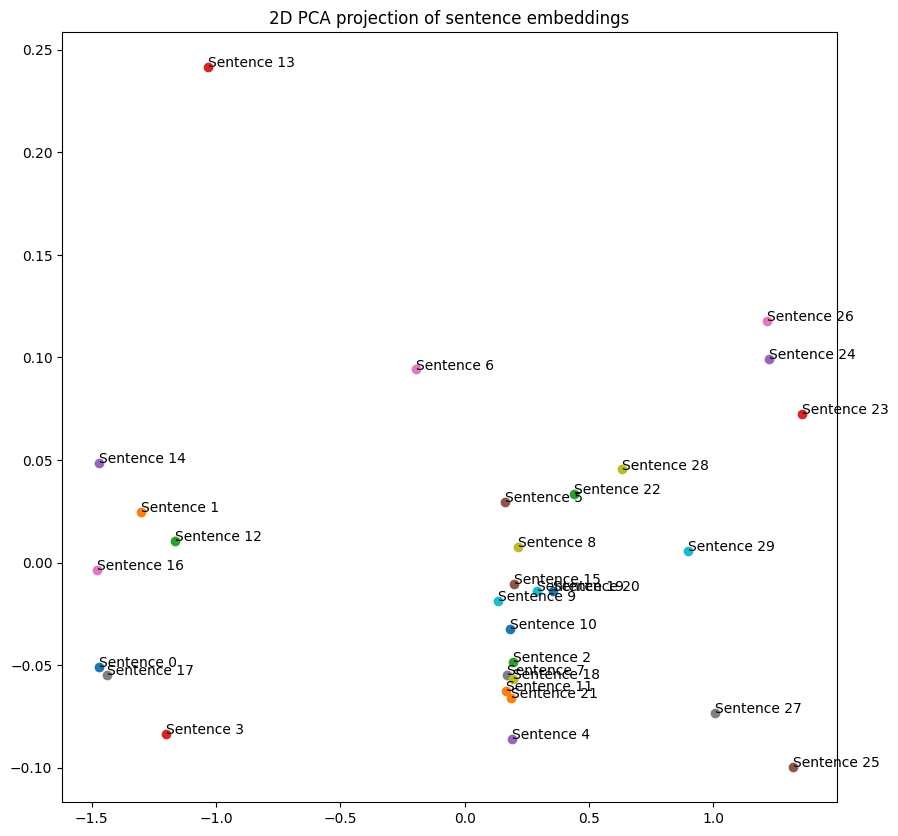

In [31]:
from sklearn.cluster import KMeans

# Number of sentences to extract (you can modify this value)
number_extract = 7

# Perform K-means clustering on the sentence embeddings
kmeans = KMeans(n_clusters=number_extract, random_state=0).fit(sentence_features)

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Assign each sentence to a cluster
sentence_clusters = kmeans.predict(sentence_features)

from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit the Nearest Neighbors model on the sentence embeddings
nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(sentence_features)

# Find the nearest sentence to each cluster center
distances, indices = nbrs.kneighbors(cluster_centers)

# Extract the sentence indices corresponding to the cluster centers
indices = np.sort(indices.reshape(1, -1))

# Get the most representative sentences for the summary
topic_answer = [paragraph_split[i] for i in indices[0]]
# Display the extracted sentences (summary)
print(f'The {number_extract} extracted sentences are:')
for i, sentence in enumerate(topic_answer, 1):
    print(f'{i}. {sentence}')

# Import required libraries
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize the clusters using PCA (optional)
array_similarity = squareform(pdist(sentence_features, metric='euclidean'))
sns.heatmap(array_similarity)
plt.title('visualizing sentence semantic similarity')

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca.fit(sentence_features)
pca_sentence_features = pca.transform(sentence_features)

# Plot the 2D PCA projection
plt.figure(figsize=(10, 10))
for i in range(len(pca_sentence_features)):
    plt.scatter(pca_sentence_features[i, 0], pca_sentence_features[i, 1])
    plt.annotate('Sentence ' + str(i), (pca_sentence_features[i, 0], pca_sentence_features[i, 1]))

plt.title('2D PCA projection of sentence embeddings')
plt.show()



# ROUGE and BLEU Evaluation


Evaluation Metrics:
ROUGE1: Precision=1.0000, Recall=0.2095, F1-Score=0.3464
ROUGE2: Precision=0.9810, Recall=0.2045, F1-Score=0.3384
ROUGEL: Precision=1.0000, Recall=0.2095, F1-Score=0.3464
BLEU: 0.0055


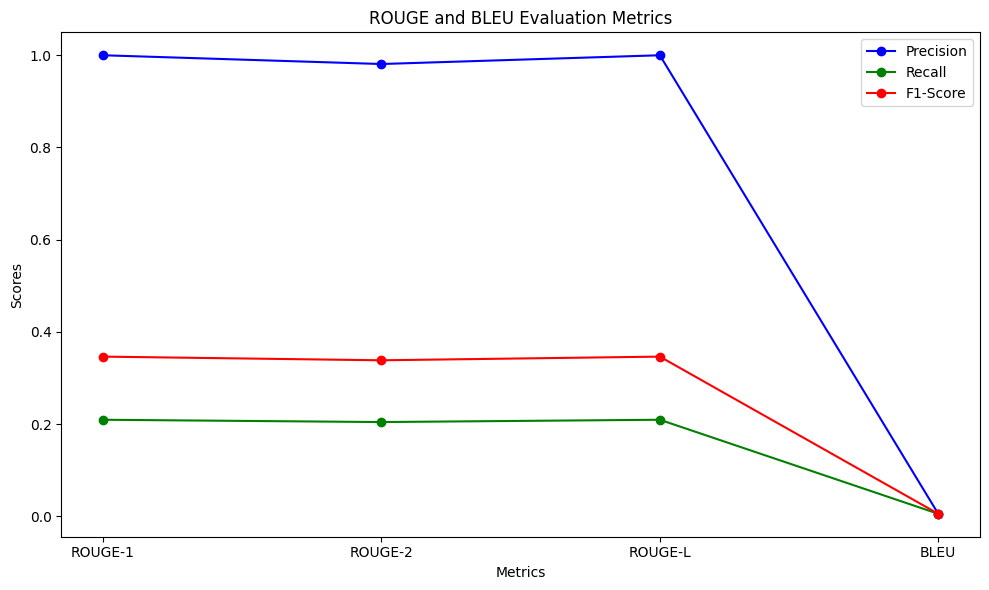

In [32]:
# Reference text (the full original text)
reference_text = paragraph

# Hypothesis text (the generated summary)
hypothesis_text = " ".join(topic_answer)

!pip install rouge-score
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt


# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Compute ROUGE scores
scores = scorer.score(reference_text, hypothesis_text)

# Compute BLEU score
smoothie = SmoothingFunction().method4  # Smoothing to handle brevity in summary
reference_tokens = [sent_tokenize(reference_text)]
hypothesis_tokens = sent_tokenize(hypothesis_text)
bleu_score = sentence_bleu(reference_tokens, hypothesis_tokens, smoothing_function=smoothie)

# Print ROUGE and BLEU Scores
print("\nEvaluation Metrics:")
for metric, score in scores.items():
    print(f"{metric.upper()}: Precision={score.precision:.4f}, Recall={score.recall:.4f}, F1-Score={score.fmeasure:.4f}")
print(f"BLEU: {bleu_score:.4f}")

# Visualization of metrics

# Prepare the data for plotting
metric_names = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
precision_scores = [scores['rouge1'].precision, scores['rouge2'].precision, scores['rougeL'].precision,
                    bleu_score]
recall_scores = [scores['rouge1'].recall, scores['rouge2'].recall, scores['rougeL'].recall,
                 bleu_score]
f1_scores = [scores['rouge1'].fmeasure, scores['rouge2'].fmeasure, scores['rougeL'].fmeasure,
             bleu_score]

# Plot Precision, Recall, F1-Score, and BLEU together
x = range(len(metric_names))
plt.figure(figsize=(10, 6))

plt.plot(x, precision_scores, label='Precision', marker='o', color='b')
plt.plot(x, recall_scores, label='Recall', marker='o', color='g')
plt.plot(x, f1_scores, label='F1-Score', marker='o', color='r')

# Adding labels
plt.xticks(x, metric_names)
plt.title('ROUGE and BLEU Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

